# Logistic Regression Theory - Classification problems

Review Chapter 4-4.3 of Introduction to Statistical Learning (Gareth James et al.)

http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf


* Logistic Regression as a method for Classification
* Classification is the problem of identifying to which category (class) a new observation belongs
* Some examples of binary classification problems (2 classes)
    * Spam vs. "Ham" emails
    * Loan default (yes/ no)
    * Disease diagnosis
* In linear regression we try to predict a continuous value
* In logistic regression we try to predict discrete categories
* The convention for binary classification is to have two classes 0 and 1
* We can't use linear regression model on binary groups, it won't lead to good fit
* Logistic regression curve (S shape) can only go between zero and one (not a line of best fit like linear regression)
* The Sigmoid (aka Logistic) Function takes in any value and output it be between 0 and 1
* The Sigmoid (aka Logistic) Function: \begin{equation*} \phi(z) = \frac{1}{1 + e^{-z}} \end{equation*}
* We can take a linear regression solution and put it into a the Sigmoid (aka Logistic) Function in order to convert linear regression into a logistic regression model
    * Linear model: \begin{equation*} y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... \end{equation*}
    * Logistic model: \begin{equation*} \phi(z) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ..)}} \end{equation*}
    * Doesn't matter what the output of the linear regression model is as it'll always be between 0 and 1 once it's put into the Sigmoid Function
* The output between 0 and 1 represents a probability of the observation belonging in the 1 class
* set a cutoff at 0.5 (50%), anything below results in class 0 and anything above is class 1


### Model Evaluation
* use a confusion matrix to evaluate classification models (TP, FP, TN, FN)
* In the example below
    * 165 patients were tested for the disease
    * the classifier predicted Yes 110 times and No 55 times
    * Since we have the test data we know 105 patients have the disease and 60 patients don't
    * True Positives = 100, we predicted they have the disease and they actually have the disease
    * True Negatives = 50, we predicted they don't have the disease and they actually don't have the disease
    * False Positives = 10 (Type I error), we predicted they have the disease and they actually **don't have** the disease
    * False Negatives= 5 (Type II error), we predicted they don't have the disease and they actually **do have** the disease
* Rates
    * Accuracy = how often is the classifier correct?
        * (TP + TN) / Total
        * in our example 150/165 = 0.91 or 91%
    * Misclassification rate (Error rate) = how often is the classifier wrong?
        * (FP + FN) / Total
        * n our example 15/165 = 0.09 or 9%


<table align='center'>
    <tr>
        <th colspan=5 style="color:darkblue; text-align:center; font-size:18px">Example</th>    
    </tr>
    <tr>
        <th></th>
        <th></th>
        <th colspan=2 style="text-align:center; font-size:15px">Predicted</th>
        <th></th>
    </tr>
    <tr>        
        <th>n=165</th>
        <th></th>
        <th><p style="color:gray; text-align:center">Yes</p><p style="color:gray; text-align:center">(+ve)</p></th>
        <th><p style="color:gray; text-align:center">No</p><p style="color:gray; text-align:center">(-ve)</p></th>
        <th></th>
    </tr>
    <tr>
        <th rowspan=2 style="text-align:center; font-size:15px">Actual</th>
        <th><p style="color:gray; text-align:center">Yes</p></th>
        <td><p style="color:green; text-align:center">100<p></td>
        <td><p style="color:red; text-align:center">5<p></td>
        <td><p style="color:gray; text-align:center">105<p></td>
    </tr>
    <tr>
        <th><p style="color:gray; text-align:center">No</p></th>
        <td><p style="color:red; text-align:center">10<p></td>
        <td><p style="color:green; text-align:center">50<p></td>
        <td><p style="color:gray; text-align:center">60<p></td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td><p style="color:gray; text-align:center">110<p></td>
        <td><p style="color:gray; text-align:center">55<p></td>
        <td></td>
    </tr>

</table>


<table align='center'>
    <tr>
        <th colspan=4 style="color:darkblue; text-align:center; font-size:18px">Confusion Matrix</th>    
    </tr>
    <tr>
        <th></th>
        <th></th>
        <th colspan=2 style="text-align:center; font-size:15px">Predicted</th>
    </tr>
    <tr>        
        <th></th>
        <th></th>
        <th><p style="color:gray; text-align:center">Yes</p><p style="color:gray; text-align:center">(+ve)</p></th>
        <th><p style="color:gray; text-align:center">No</p><p style="color:gray; text-align:center">(-ve)</p></th>
    </tr>
    <tr>
        <th rowspan=2 style="text-align:center; font-size:15px">Actual</th>
        <th><p style="color:gray; text-align:center">Yes</p><p style="color:gray; text-align:center">(+ve)</p></th>
        <td><p style="color:green; text-align:center">True Positives (TP)<p></td>
        <td><p style="color:red; text-align:center">False Negatives (FN)<p><p style="color:red; text-align:center">(Type II error)</p></td>
    </tr>
    <tr>
        <th><p style="color:gray; text-align:center">No</p><p style="color:gray; text-align:center">(-ve)</p></th>
        <td><p style="color:red; text-align:center">False Positives (FP)<p><p style="color:red; text-align:center">(Type I error)</p></td>
        <td><p style="color:green; text-align:center">True Negatives (TN)<p></td>
    </tr>

</table>


___
___

# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [80]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [10]:
# boolean dataframe
train.isnull().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False


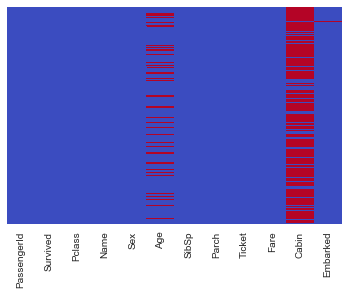

In [81]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')
# missing data are the red lines
# missing Age info and a lot of cabin info
# around 20% age data is missing, it's small enough for us to fill in
# missing too much of cabin data, so either drop it or feature engineer a cabin known (1, 0) col
# one missing Embarked value

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [14]:
sns.set_style("whitegrid")

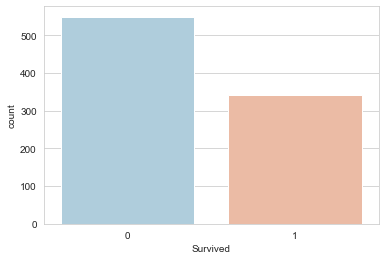

In [21]:
# for classification problem it's good idea to see ratio of the class options
# in this case who survived and who didn't
sns.countplot(x='Survived', data=train, palette='RdBu_r')
# ~40% survived

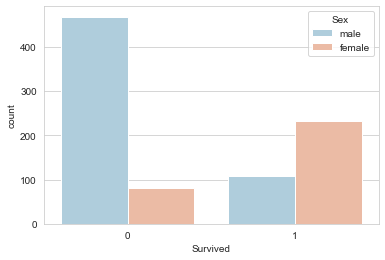

In [22]:
# split by Sex
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')
# survivors: 60:40 split in favor of female
# non-survivors: 80:20 split in favor of male

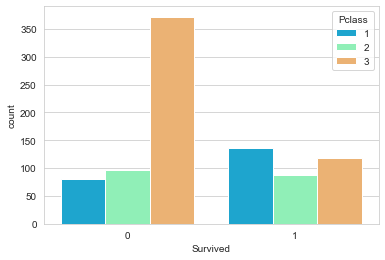

In [24]:
# split by class
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')
# survivors: 20:20:60 split in favor of female
# non-survivors: 30:30:30 split across all classes, but there would be more 3rd class people in total

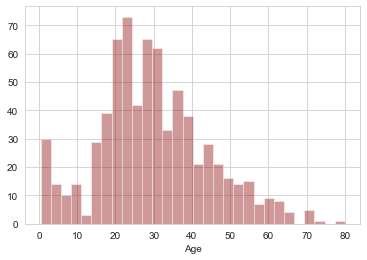

In [30]:
# distribution of age
sns.distplot(train['Age'].dropna(), bins=30, kde=False, color='darkred')
# bimodal distribution
# skew for younger passengers

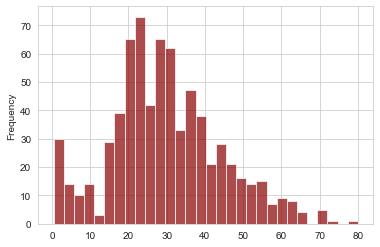

In [35]:
# pandas dist plot
train['Age'].plot.hist(bins=30,color='darkred',alpha=0.7)

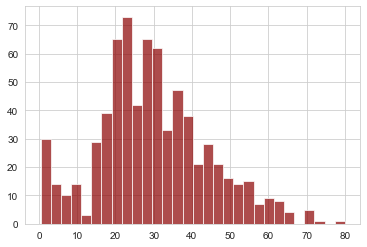

In [36]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

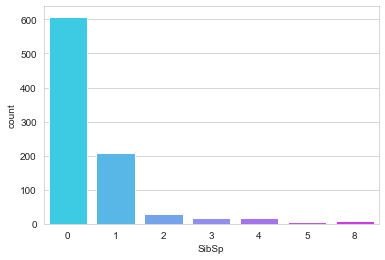

In [45]:
# countplot of siblings
sns.countplot(x='SibSp', data=train, palette='cool')
# 75% people had no spouse/children onboard
# 25% people had one spouse/child onboard, most likely spouse

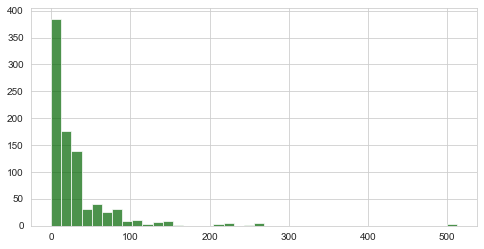

In [52]:
# distribution of fare
train['Fare'].hist(color='darkgreen', alpha=0.7, bins=40,figsize=(8,4))
# mostly cheaper ticket, which makes sense since most passengers are 3rd class

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [54]:
import cufflinks as cf

In [55]:
cf.go_offline()

In [61]:
train['Fare'].iplot(kind='hist',bins=40,color='darkgreen')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


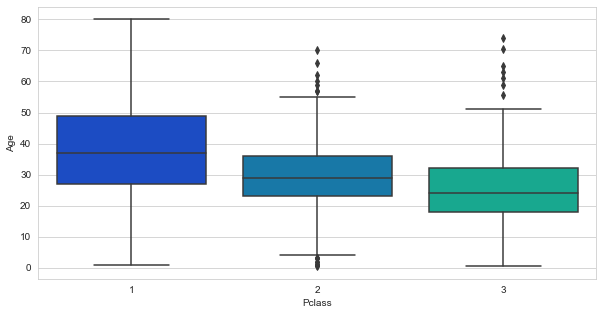

In [67]:
plt.figure(figsize=(10, 5))
# see mean passenger age by class
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
# 1st class avg age 37, older people acquired more wealth
# 2nd class avg age 29
# 3rd class avg age 24 - mostly young men

# can alsoc create a linear regression model to predict age
# but imputation by class is sufficient

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [82]:
train['Age'].mean()

29.69911764705882

In [83]:
train[train['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [84]:
train[train['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [85]:
train[train['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [76]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 # can get actual mean using train DF and mean()
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function!

In [86]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

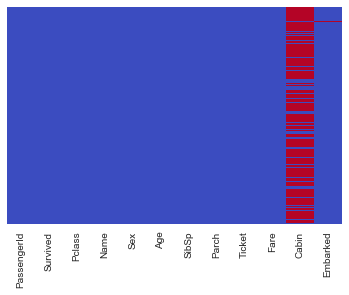

In [87]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')
# missing ages are now filled in based on the class avg

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [88]:
train.drop('Cabin', axis=1, inplace=True)

In [89]:
train.head(2)
# Cabin col gone

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


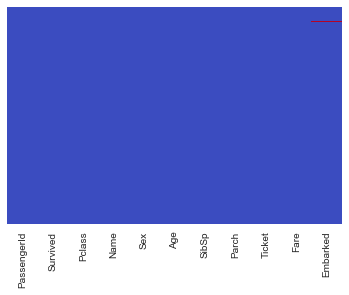

In [90]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')

In [91]:
# drop any other rows with missing values
train.dropna(inplace=True)

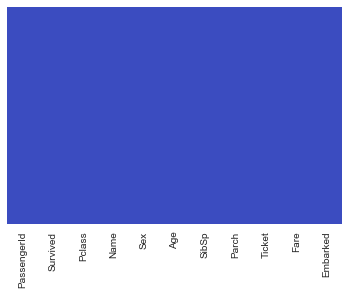

In [92]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')
# null Embard row gone

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [95]:
# change Sex, Embarked,Pclass in to dummy values (0,1,...)
pd.get_dummies(train['Sex']).head(3) # drop original col
# creates a col for each category with a boolean value
# however for male vs female, they're perfect predictors of each over, known as multi-colinearity, so you only need 1 of the cols

,female,male
0,0,1
1,1,0
2,1,0


In [97]:
# however for male vs female, they're perfect predictors of each over, known as multi-colinearity
# it'll messup the algorithm
# so you only need 1 of the cols
pd.get_dummies(train['Sex'], drop_first=True).head(3)

,male
0,1
1,0
2,0


In [98]:
# create dummy value data frames for Sex
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [101]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [99]:
# create dummy value data frames for Embarked
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [100]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [110]:
# *****leave Pclass as it is for now for the model, can conver to dummy variable next iteration
# *****See how the model treat a Category vs Continuouse variable

In [103]:
# drop categorical cols Sex, Embarked
# drop irrelevant cols: Name, Ticket
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
# could feature engineer from Name or Ticket
# e.g. extract name by Mr, Mrs, Ms, Master, Dr, Rev
# or extract first letter of ticket as it might indicate located on ship (front back, port, starboard)

In [104]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833


In [105]:
# concat the Categorical dummy DFs
train = pd.concat([train, sex, embark], axis=1)

In [106]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [108]:
# Passenger ID is just an index, should have no predictive value
train.drop('PassengerId', axis=1, inplace=True)

In [109]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

Let's move on to evaluate our model!

In [107]:
from sklearn.model_selection import train_test_split

In [112]:
X = train.drop('Survived', axis=1)

In [113]:
y = train['Survived']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [115]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0


In [116]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

## Training and Predicting

In [117]:
from sklearn.linear_model import LogisticRegression

In [125]:
# create instance of LogisticRegression
logmodel = LogisticRegression(solver='liblinear') # default solver='warn' for me, Jose's default is liblinear
# more param available to fine tune

In [127]:
# Train (fit) the model
logmodel.fit(X_train, y_train) # outputs default values that can be fine tunded in cell above

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
predictions = logmodel.predict(X_test)

In [132]:
print(predictions[0:10])

[0 0 1 1 0 0 0 0 0 1]


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [134]:
from sklearn.metrics import classification_report
# SKlearn builtin classification_report will give precision,recall,f1-score

In [136]:
print(classification_report(y_test, predictions))
# returns precision, recall, F1-score for each class and avg total
# 81% accurate

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [137]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [139]:
print(confusion_matrix(y_test, predictions))
# TN, FN
# FP, TP

[[148  15]
 [ 36  68]]


Not so bad! You might want to explore other feature engineering and the other titanic_test.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?